<a href="https://colab.research.google.com/github/theFulminatedHuman/AIDS-Project-/blob/main/AIDS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
after_covid = yf.download('^NSEI', start='2023-01-01', end='2025-04-30')
during_covid = yf.download('^NSEI', start='2019-05-01', end='2021-01-01')
before_covid=yf.download('^NSEI', start='2016-05-01', end='2019-01-01')
# nifty_after_covid.dropna(inplace=True)
# nifty_during_covid.dropna(inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(after_covid.head())

Price              Close          High           Low          Open  Volume
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI
Date                                                                      
2023-01-02  18197.449219  18215.150391  18086.500000  18131.699219  256100
2023-01-03  18232.550781  18251.949219  18149.800781  18163.199219  208700
2023-01-04  18042.949219  18243.000000  18020.599609  18230.650391  235200
2023-01-05  17992.150391  18120.300781  17892.599609  18101.949219  269900
2023-01-06  17859.449219  18047.400391  17795.550781  18008.050781  238200


In [ ]:
print(after_covid.shape)
print(during_covid.shape)
print(before_covid.shape)

(570, 5)
(413, 5)
(659, 5)


In [ ]:
print(after_covid['Volume'].mean())
print(during_covid['Volume'].mean())
print(before_covid['Volume'].mean())

Ticker
^NSEI    292925.263158
dtype: float64
Ticker
^NSEI    614819.37046
dtype: float64
Ticker
^NSEI    213563.429439
dtype: float64


###Simple returns

In [ ]:
after_covid['returns']=after_covid['Close'].pct_change()
during_covid['returns']=during_covid['Close'].pct_change()
before_covid['returns']=before_covid['Close'].pct_change()

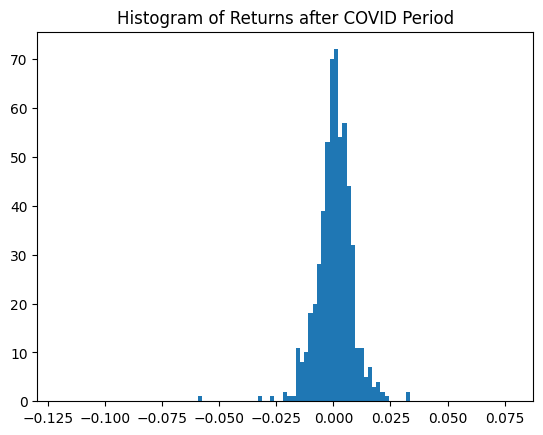

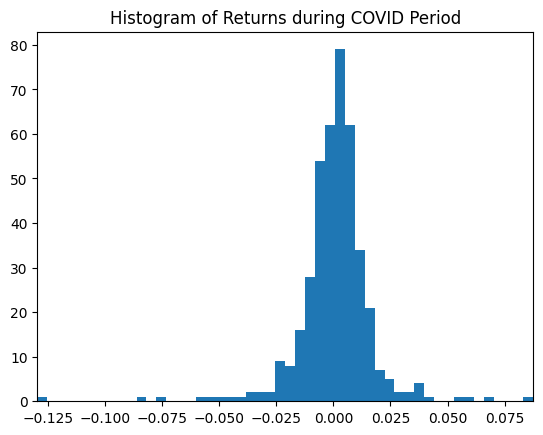

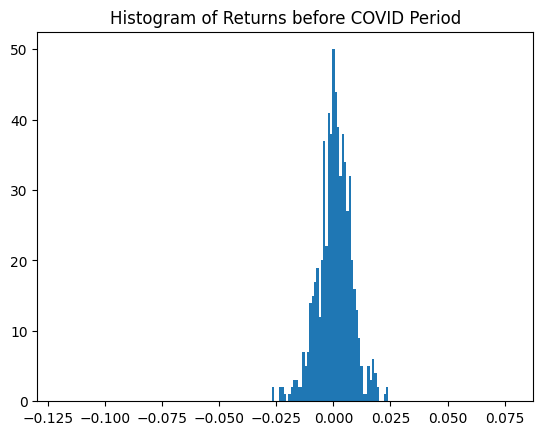

After COVID - Mean: 0.0005425097440865465, Std Dev: 0.007934348317148626
During COVID - Mean: 0.0005654081202471254, Std Dev: 0.016498080217845355
Before COVID - Mean: 0.0005292781531361616, Std Dev: 0.007345996881245606


In [ ]:
all_returns = pd.concat([before_covid['returns'], during_covid['returns'], after_covid['returns']])

# Determine the common limits for x-axis and y-axis
x_min = all_returns.min()
x_max = all_returns.max()

# Plot histogram for 'after_covid'
plt.hist(after_covid['returns'].dropna(), bins=50)
plt.title('Histogram of Returns after COVID Period')
plt.xlim(x_min, x_max)  # Set x-axis limit
   # Set y-axis limit
plt.show()

# Plot histogram for 'during_covid'
plt.hist(during_covid['returns'].dropna(), bins=50)
plt.title('Histogram of Returns during COVID Period')
plt.xlim(x_min, x_max)  # Set x-axis limit     # Set y-axis limit
plt.show()

# Plot histogram for 'before_covid'
plt.hist(before_covid['returns'].dropna(), bins=50)
plt.title('Histogram of Returns before COVID Period')
plt.xlim(x_min, x_max)  # Set x-axis limit      # Set y-axis limit
plt.show()

# Print the means and standard deviations for all periods
print(f"After COVID - Mean: {after_covid['returns'].mean()}, Std Dev: {after_covid['returns'].std()}")
print(f"During COVID - Mean: {during_covid['returns'].mean()}, Std Dev: {during_covid['returns'].std()}")
print(f"Before COVID - Mean: {before_covid['returns'].mean()}, Std Dev: {before_covid['returns'].std()}")

###Log returns

In [ ]:
after_covid['log_returns'] = np.log(after_covid['Close'] /after_covid['Close'].shift(1))
during_covid['log_returns'] = np.log(during_covid['Close'] / during_covid['Close'].shift(1))
before_covid['log_returns'] = np.log(before_covid['Close'] / before_covid['Close'].shift(1))


In [ ]:
print(after_covid)

Price              Close          High           Low          Open  Volume  \
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI   
Date                                                                         
2023-01-02  18197.449219  18215.150391  18086.500000  18131.699219  256100   
2023-01-03  18232.550781  18251.949219  18149.800781  18163.199219  208700   
2023-01-04  18042.949219  18243.000000  18020.599609  18230.650391  235200   
2023-01-05  17992.150391  18120.300781  17892.599609  18101.949219  269900   
2023-01-06  17859.449219  18047.400391  17795.550781  18008.050781  238200   
...                  ...           ...           ...           ...     ...   
2025-04-23  24328.949219  24359.300781  24119.949219  24357.599609  415000   
2025-04-24  24246.699219  24347.849609  24216.150391  24277.900391  358800   
2025-04-25  24039.349609  24365.449219  23847.849609  24289.000000  387700   
2025-04-28  24328.500000  24355.099609  24054.050781  24070.2500

In [ ]:
# Drop NaN values for clean data
before = before_covid['log_returns'].dropna()
during = during_covid['log_returns'].dropna()
after = after_covid['log_returns'].dropna()


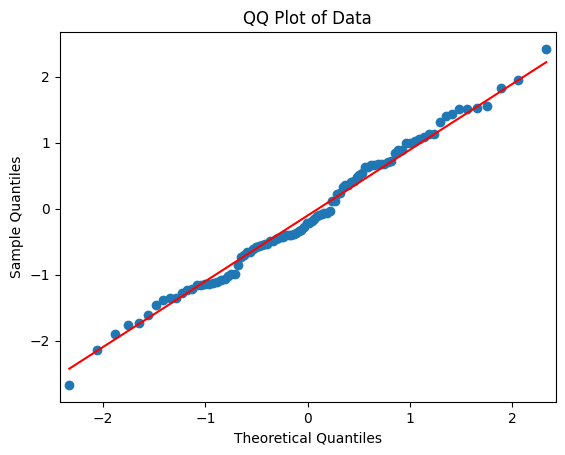

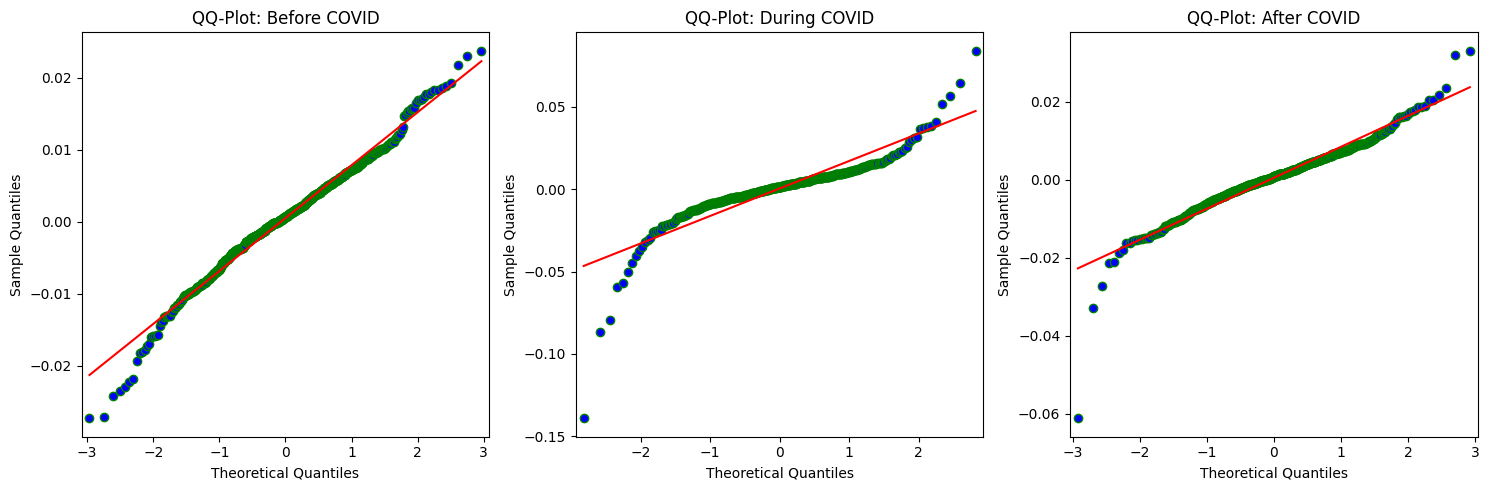

In [ ]:
import statsmodels.api as sm


# Generate some random data
data = np.random.normal(0, 1, 100)

# Create the QQ plot
sm.qqplot(data, line='s')
plt.title('QQ Plot of Data')
plt.show()
plt.figure(figsize=(15, 5))

# Before COVID (explicitly set color in qqplot)
plt.subplot(1, 3, 1)
sm.qqplot(before, line='s', ax=plt.gca(), markerfacecolor='blue', markeredgecolor='green')
plt.title('QQ-Plot: Before COVID')

# During COVID
plt.subplot(1, 3, 2)
sm.qqplot(during, line='s', ax=plt.gca(), markerfacecolor='blue', markeredgecolor='green')
plt.title('QQ-Plot: During COVID')

# After COVID
plt.subplot(1, 3, 3)
sm.qqplot(after, line='s', ax=plt.gca(), markerfacecolor='blue', markeredgecolor='green')
plt.title('QQ-Plot: After COVID')

plt.tight_layout()
plt.show()

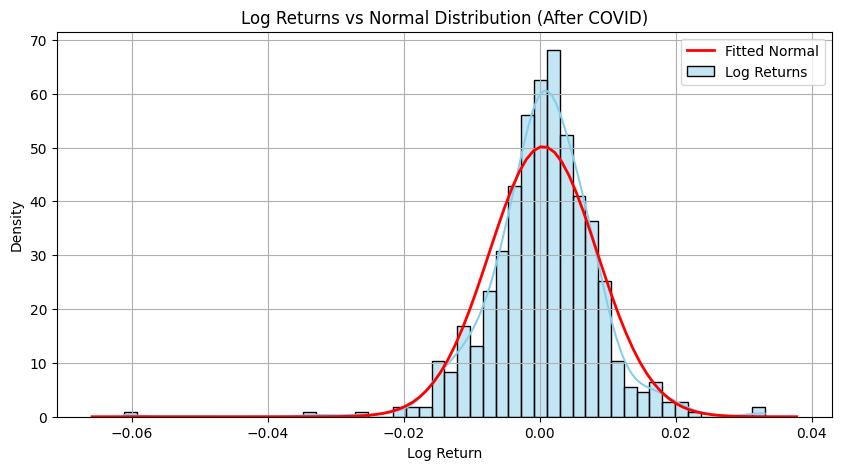

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
#returns = after_covid['log_returns'].dropna()
mu, std = norm.fit(after)
plt.figure(figsize=(10, 5))
sns.histplot(after, kde=True, stat='density', bins=50, color='skyblue', label='Log Returns')
mu, std = norm.fit(after)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Fitted Normal')


plt.title('Log Returns vs Normal Distribution (After COVID)')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


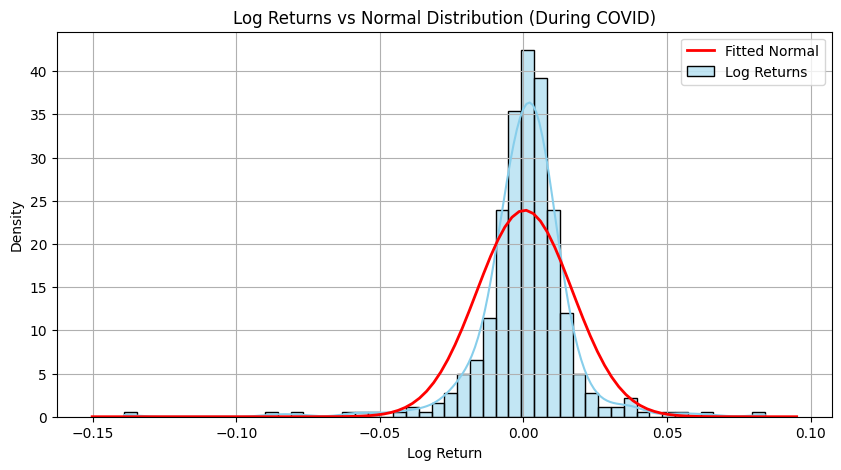

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
#returns = during_covid['log_returns'].dropna()
mu, std = norm.fit(during)
plt.figure(figsize=(10, 5))
sns.histplot(during, kde=True, stat='density', bins=50, color='skyblue', label='Log Returns')
mu, std = norm.fit(during)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Fitted Normal')

plt.title('Log Returns vs Normal Distribution (During COVID)')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


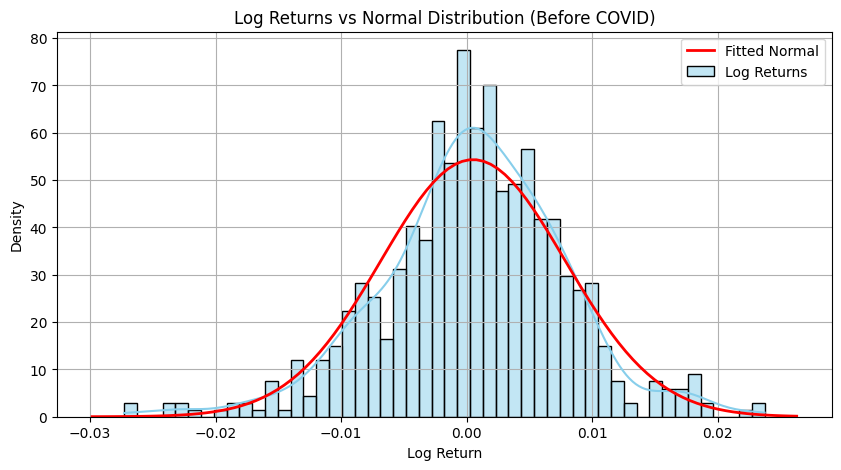

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
#returns = before_covid['log_returns'].dropna()
mu, std = norm.fit(before)
plt.figure(figsize=(10, 5))
sns.histplot(before, kde=True, stat='density', bins=50, color='skyblue', label='Log Returns')
mu, std = norm.fit(before)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label='Fitted Normal')

plt.title('Log Returns vs Normal Distribution (Before COVID)')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

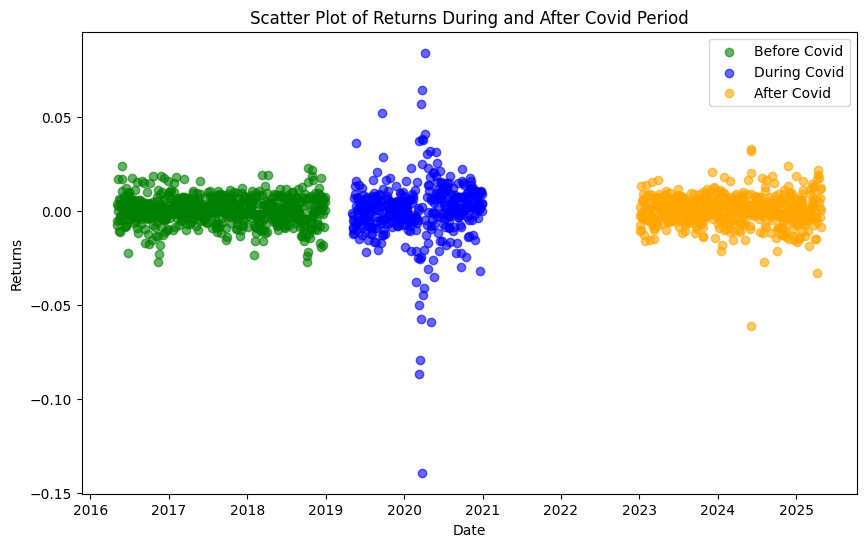

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot both datasets with a bit of transparency to see overlapping points
plt.scatter(before_covid.index, before_covid['log_returns'],
            label='Before Covid', alpha=0.6, color='green')
plt.scatter(during_covid.index, during_covid['log_returns'],
            label='During Covid', alpha=0.6, color='blue')
plt.scatter(after_covid.index,after_covid['log_returns'],
            label='After Covid', alpha=0.6, color='orange')

plt.title('Scatter Plot of Returns During and After Covid Period')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Drop NaN values for clean data
before = before_covid['log_returns'].dropna()
during = during_covid['log_returns'].dropna()
after = after_covid['log_returns'].dropna()

# Case 1: Before vs During COVID
t_stat1, p_val1 = ttest_ind(before, during, equal_var=False)
print(f"Before vs During COVID: t-stat = {t_stat1:.4f}, p-value = {p_val1:.4f}")

# Case 2: During vs After COVID
t_stat2, p_val2 = ttest_ind(during, after, equal_var=False)
print(f"During vs After COVID: t-stat = {t_stat2:.4f}, p-value = {p_val2:.4f}")

# Case 3: Before vs After COVID
t_stat3, p_val3 = ttest_ind(before, after, equal_var=False)
print(f"Before vs After COVID: t-stat = {t_stat3:.4f}, p-value = {p_val3:.4f}")

Before vs During COVID: t-stat = 0.0859, p-value = 0.9316
During vs After COVID: t-stat = -0.0941, p-value = 0.9251
Before vs After COVID: t-stat = -0.0197, p-value = 0.9843


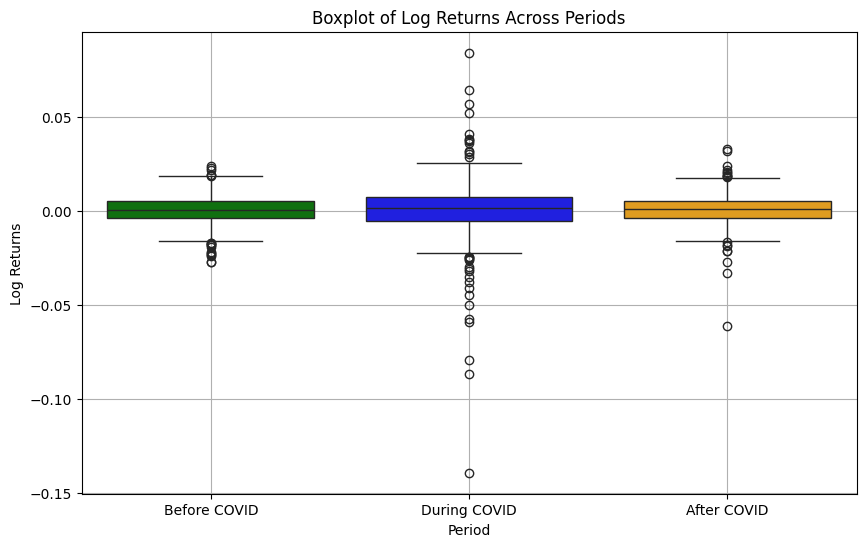

In [ ]:
# Combine data into a DataFrame for cleaner plotting
df_returns = pd.DataFrame({
    'Log_Returns': np.concatenate([before, during, after]),
    'Period': ['Before COVID']*len(before) + ['During COVID']*len(during) + ['After COVID']*len(after)
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_returns, x='Period', y='Log_Returns',
            palette=['green', 'blue', 'orange'], hue='Period', legend=False)
plt.title('Boxplot of Log Returns Across Periods')
plt.xlabel('Period')
plt.ylabel('Log Returns')
plt.grid(True)
plt.show()

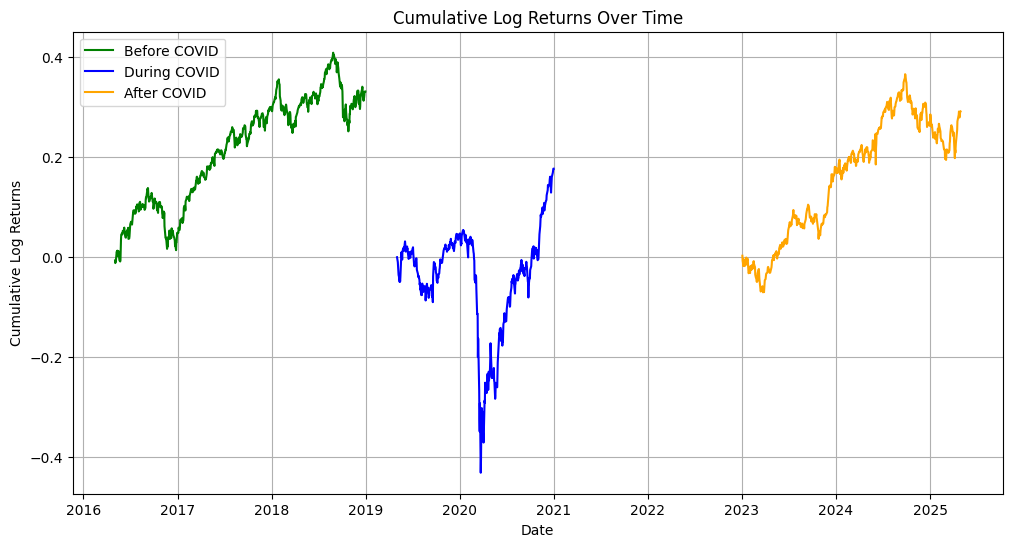

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(before_covid.index, before_covid['log_returns'].cumsum(), label='Before COVID', color='green')
plt.plot(during_covid.index, during_covid['log_returns'].cumsum(), label='During COVID', color='blue')
plt.plot(after_covid.index, after_covid['log_returns'].cumsum(), label='After COVID', color='orange')
plt.title('Cumulative Log Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Log Returns')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
during_covid['rolling_volatility_7'] = during_covid['log_returns'].rolling(window=7).std() * np.sqrt(7)
after_covid['rolling_volatility_7']=after_covid['log_returns'].rolling(window=7).std() * np.sqrt(7)
before_covid['rolling_volatility_7']=before_covid['log_returns'].rolling(window=7).std() * np.sqrt(7)

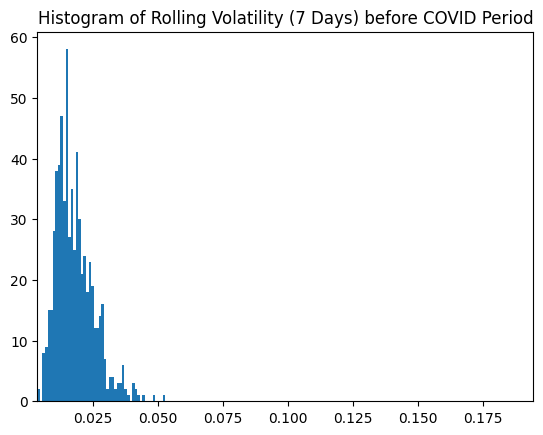

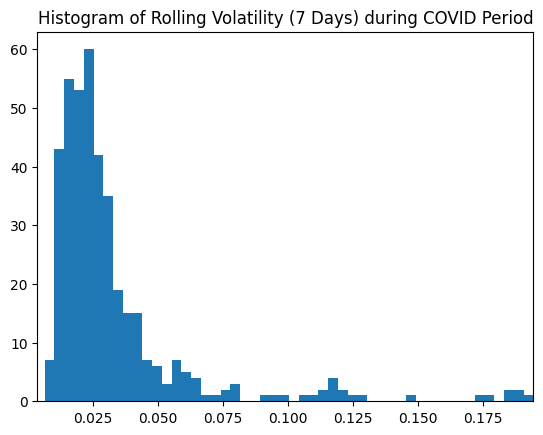

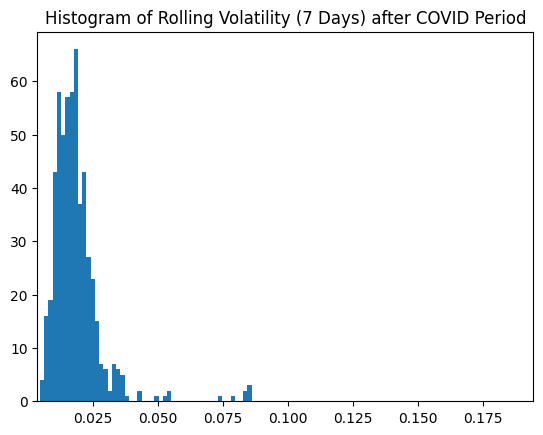

In [ ]:
x_max=max(after_covid['rolling_volatility_7'].max(),during_covid['rolling_volatility_7'].max(),before_covid['rolling_volatility_7'].max())
x_min=min(after_covid['rolling_volatility_7'].min(),during_covid['rolling_volatility_7'].min(),before_covid['rolling_volatility_7'].min())
plt.hist(before_covid['rolling_volatility_7'].dropna(), bins=50)
plt.title('Histogram of Rolling Volatility (7 Days) before COVID Period')
plt.xlim(x_min,x_max)
plt.show()
plt.hist(during_covid['rolling_volatility_7'].dropna(), bins=50)
plt.title('Histogram of Rolling Volatility (7 Days) during COVID Period')
plt.xlim(x_min,x_max)
plt.show()
plt.hist(after_covid['rolling_volatility_7'].dropna(), bins=50)
plt.title('Histogram of Rolling Volatility (7 Days) after COVID Period')
plt.xlim(x_min,x_max)
plt.show()

In [ ]:
log_volat_before=np.log(before_covid['rolling_volatility_7'])
log_volat_during=np.log(during_covid['rolling_volatility_7'])
log_volat_after=np.log(after_covid['rolling_volatility_7'])

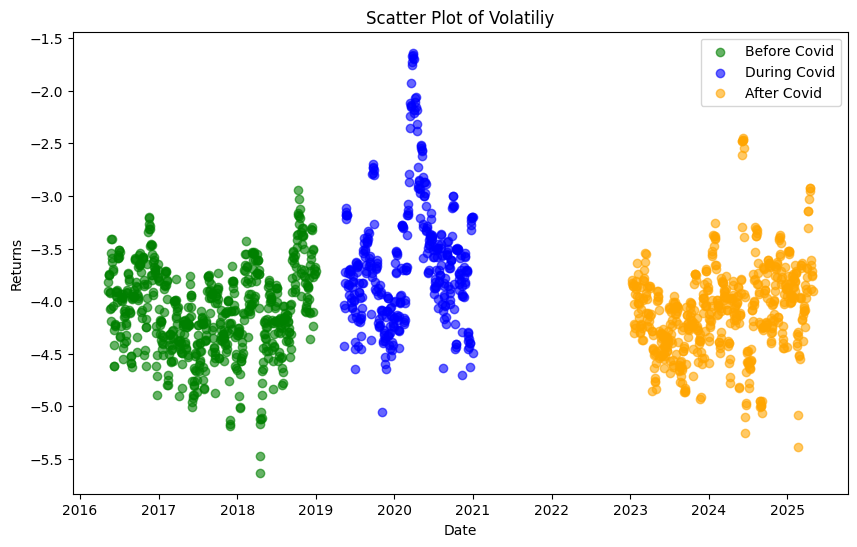

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot both datasets with a bit of transparency to see overlapping points
plt.scatter(before_covid.index, log_volat_before,
            label='Before Covid', alpha=0.6, color='green')
plt.scatter(during_covid.index, log_volat_during,
            label='During Covid',alpha=0.6, color='blue')
plt.scatter(after_covid.index,log_volat_after,
            label='After Covid', alpha=0.6, color='orange')

plt.title('Scatter Plot of Volatiliy')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


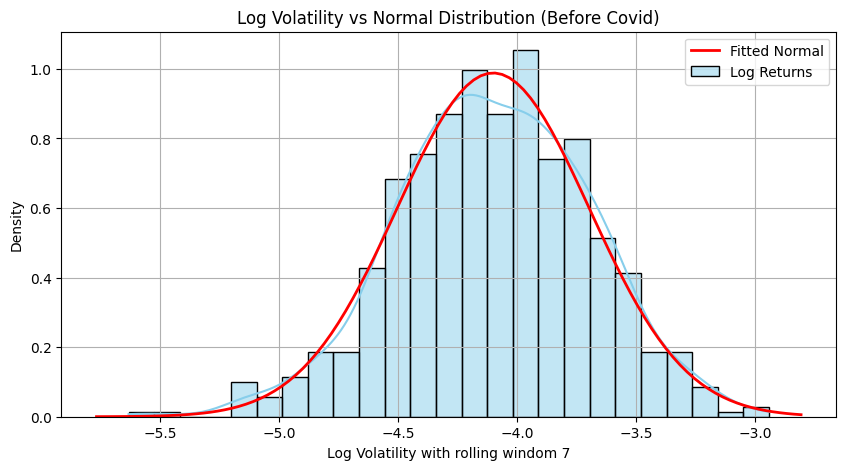

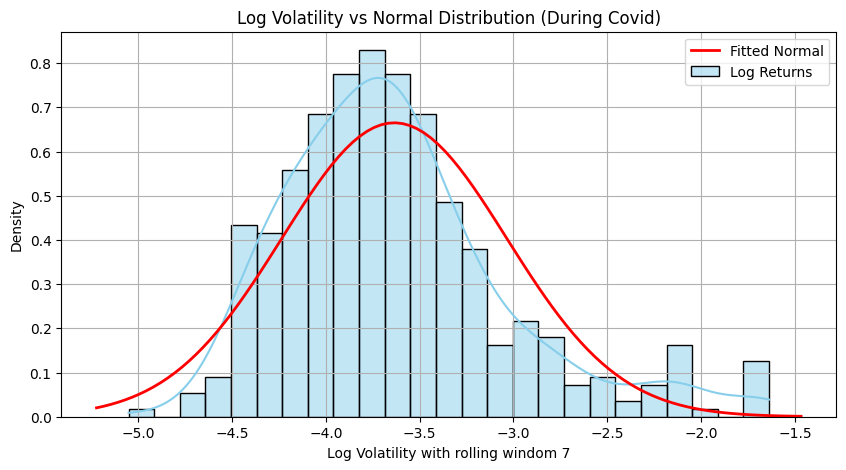

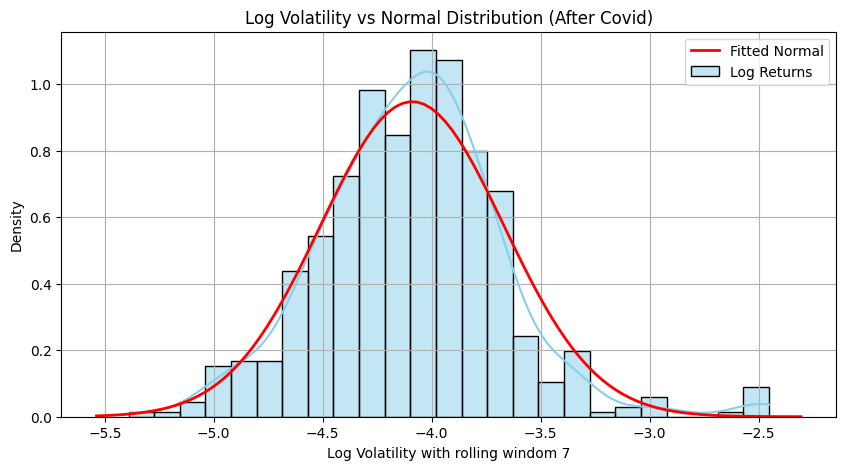

In [ ]:
data=[log_volat_before,log_volat_during,log_volat_after]
name=['Before Covid', 'During Covid', 'After Covid']
i=0
for dat in data:
  mu, std = norm.fit(dat.dropna())
  plt.figure(figsize=(10, 5))
  sns.histplot(dat, kde=True, stat='density', bins=25, color='skyblue', label='Log Returns')
  mu, std = norm.fit(dat.dropna())
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)
  plt.plot(x, p, 'r', linewidth=2, label='Fitted Normal')

  plt.title(f'Log Volatility vs Normal Distribution ({name[i]})')
  i+=1
  plt.xlabel('Log Volatility with rolling windom 7')
  plt.ylabel('Density')
  plt.legend()
  plt.grid(True)
  plt.show()


In [ ]:
from scipy import stats
def Normal_hypothesis_test(data1,data2,alpha=0.05):
  mu1=np.mean(data1)
  mu2=np.mean(data2)
  std1=np.std(data1)
  std2=np.std(data2)
  n1=len(data1)
  n2=len(data2)
  z_stat=(mu1-mu2)/np.sqrt((std1**2/n1)+(std2**2/n2))
  p_value = stats.norm.sf(abs(z_stat)) * 2
  print(f"z-statistic: {z_stat:.4f}")
  print(f"p-value: {p_value:.4f}")
  if(p_value<alpha):
    print(f"Reject Null Hypothesis, p-value")
  else:
    print("Fail to reject Null Hypothesis")


In [ ]:
Normal_hypothesis_test(log_volat_before,log_volat_during)

z-statistic: -13.8872
p-value: 0.0000
Reject Null Hypothesis, p-value


In [ ]:
Normal_hypothesis_test(log_volat_before,log_volat_after)

z-statistic: -0.4228
p-value: 0.6724
Fail to reject Null Hypothesis


In [ ]:
Normal_hypothesis_test(log_volat_during,log_volat_after)

z-statistic: 13.2195
p-value: 0.0000
Reject Null Hypothesis, p-value


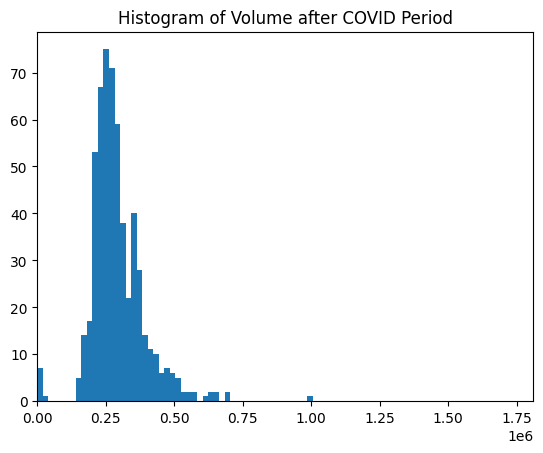

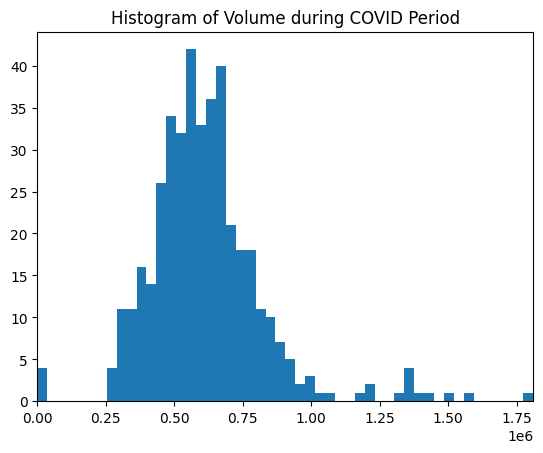

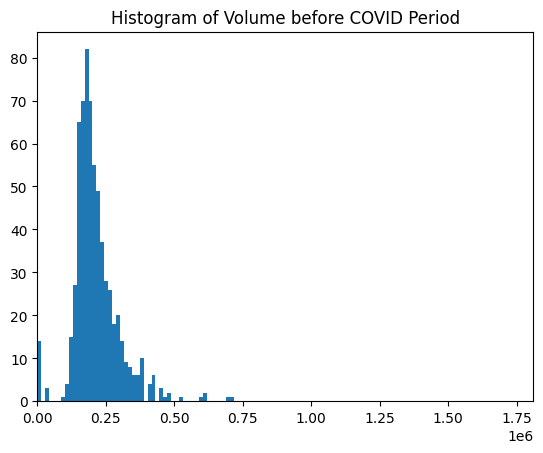

After COVID - Mean: 292925.26, Std Dev: 97654.14
During COVID - Mean: 614819.37, Std Dev: 215326.47
Before COVID - Mean: 213563.43, Std Dev: 84537.62


In [ ]:
# Combine volume data across periods and get scalar limits
all_volumes = pd.concat([
    before_covid['Volume'].dropna(),
    during_covid['Volume'].dropna(),
    after_covid['Volume'].dropna()
])
x_min, x_max = all_volumes.min().item(), all_volumes.max().item()

# After COVID
plt.hist(after_covid['Volume'].dropna(), bins=50)
plt.title('Histogram of Volume after COVID Period')
plt.xlim(x_min, x_max)
plt.show()

# During COVID
plt.hist(during_covid['Volume'].dropna(), bins=50)
plt.title('Histogram of Volume during COVID Period')
plt.xlim(x_min, x_max)
plt.show()

# Before COVID
plt.hist(before_covid['Volume'].dropna(), bins=50)
plt.title('Histogram of Volume before COVID Period')
plt.xlim(x_min, x_max)
plt.show()

# Mean and standard deviation
print(f"After COVID - Mean: {after_covid['Volume'].dropna().mean().item():.2f}, Std Dev: {after_covid['Volume'].dropna().std().item():.2f}")
print(f"During COVID - Mean: {during_covid['Volume'].dropna().mean().item():.2f}, Std Dev: {during_covid['Volume'].dropna().std().item():.2f}")
print(f"Before COVID - Mean: {before_covid['Volume'].dropna().mean().item():.2f}, Std Dev: {before_covid['Volume'].dropna().std().item():.2f}")


In [ ]:
# Compute log volume changes
after_covid['log_volume'] = np.log(after_covid['Volume'] / after_covid['Volume'].shift(1))
during_covid['log_volume'] = np.log(during_covid['Volume'] / during_covid['Volume'].shift(1))
before_covid['log_volume'] = np.log(before_covid['Volume'] / before_covid['Volume'].shift(1))

# Drop NaNs
before_vol = before_covid['log_volume'].dropna()
during_vol = during_covid['log_volume'].dropna()
after_vol = after_covid['log_volume'].dropna()


/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


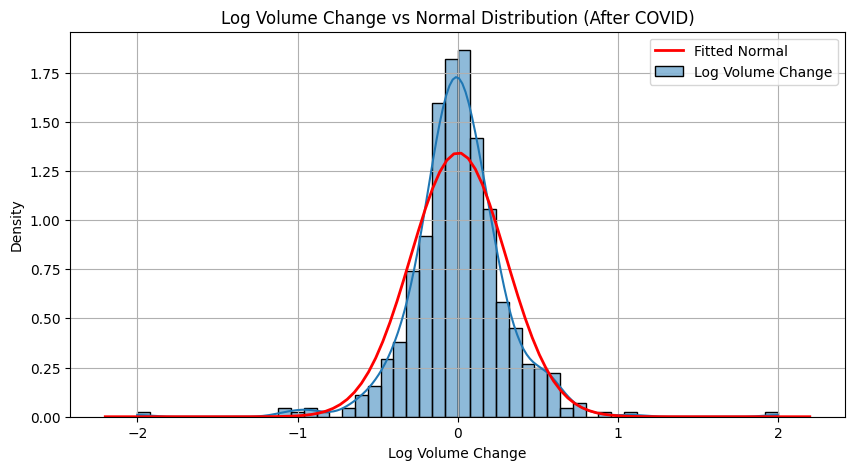

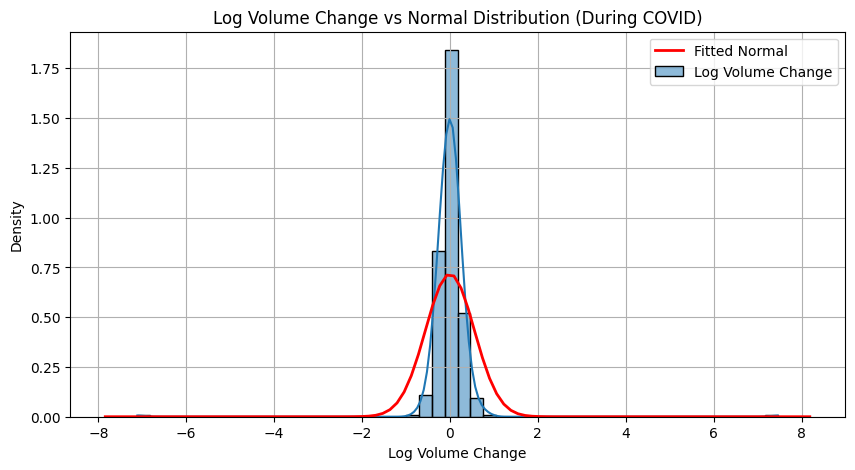

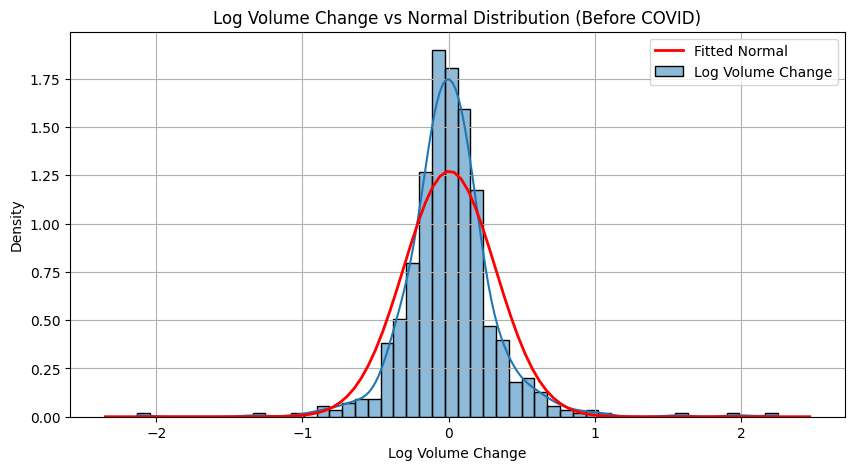

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Clean log‐volume series
clean_after = after_vol.replace([np.inf, -np.inf], np.nan).dropna()
clean_during = during_vol.replace([np.inf, -np.inf], np.nan).dropna()
clean_before = before_vol.replace([np.inf, -np.inf], np.nan).dropna()

# After COVID
mu, std = norm.fit(clean_after)
plt.figure(figsize=(10, 5))
sns.histplot(clean_after, kde=True, stat='density', bins=50, label='Log Volume Change')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, norm.pdf(x, mu, std), 'r', linewidth=2, label='Fitted Normal')
plt.title('Log Volume Change vs Normal Distribution (After COVID)')
plt.xlabel('Log Volume Change')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# During COVID
mu, std = norm.fit(clean_during)
plt.figure(figsize=(10, 5))
sns.histplot(clean_during, kde=True, stat='density', bins=50, label='Log Volume Change')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, norm.pdf(x, mu, std), 'r', linewidth=2, label='Fitted Normal')
plt.title('Log Volume Change vs Normal Distribution (During COVID)')
plt.xlabel('Log Volume Change')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Before COVID
mu, std = norm.fit(clean_before)
plt.figure(figsize=(10, 5))
sns.histplot(clean_before, kde=True, stat='density', bins=50, label='Log Volume Change')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, norm.pdf(x, mu, std), 'r', linewidth=2, label='Fitted Normal')
plt.title('Log Volume Change vs Normal Distribution (Before COVID)')
plt.xlabel('Log Volume Change')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


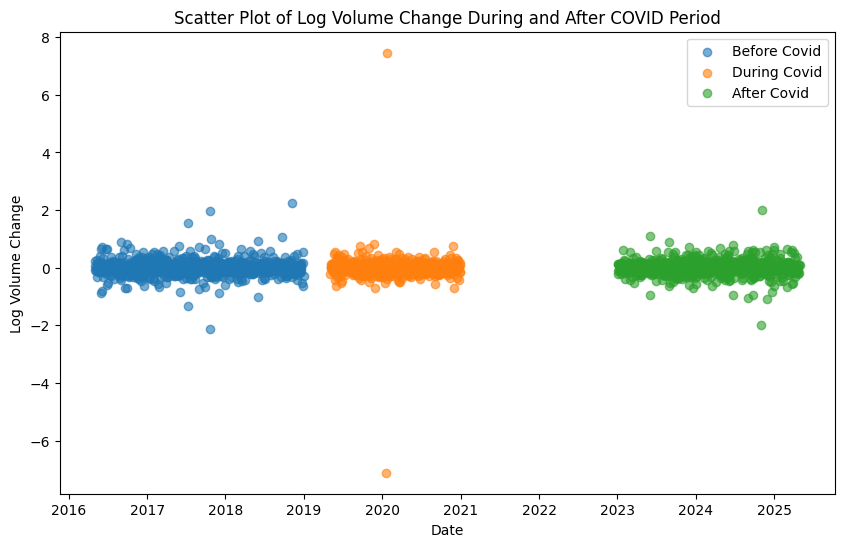

In [ ]:
import matplotlib.pyplot as plt

# Prepare clean log‐volume series
s_before = before_covid['log_volume'].replace([np.inf, -np.inf], np.nan).dropna()
s_during = during_covid['log_volume'].replace([np.inf, -np.inf], np.nan).dropna()
s_after = after_covid['log_volume'].replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(10, 6))
plt.scatter(s_before.index, s_before, label='Before Covid', alpha=0.6)
plt.scatter(s_during.index, s_during, label='During Covid', alpha=0.6)
plt.scatter(s_after.index, s_after, label='After Covid', alpha=0.6)

plt.title('Scatter Plot of Log Volume Change During and After COVID Period')
plt.xlabel('Date')
plt.ylabel('Log Volume Change')
plt.legend()
plt.show()


In [ ]:
from scipy.stats import ttest_ind
import numpy as np

# Clean and drop NaNs/Infs
before = before_covid['log_volume'].replace([np.inf, -np.inf], np.nan).dropna()
during = during_covid['log_volume'].replace([np.inf, -np.inf], np.nan).dropna()
after = after_covid['log_volume'].replace([np.inf, -np.inf], np.nan).dropna()

# Before vs During COVID
t_stat1, p_val1 = ttest_ind(before, during, equal_var=False)
print(f"Before vs During COVID: t-stat = {t_stat1:.4f}, p-value = {p_val1:.4f}")

# During vs After COVID
t_stat2, p_val2 = ttest_ind(during, after, equal_var=False)
print(f"During vs After COVID: t-stat = {t_stat2:.4f}, p-value = {p_val2:.4f}")

# Before vs After COVID
t_stat3, p_val3 = ttest_ind(before, after, equal_var=False)
print(f"Before vs After COVID: t-stat = {t_stat3:.4f}, p-value = {p_val3:.4f}")


Before vs During COVID: t-stat = 0.2107, p-value = 0.8332
During vs After COVID: t-stat = -0.0937, p-value = 0.9254
Before vs After COVID: t-stat = 0.1995, p-value = 0.8419


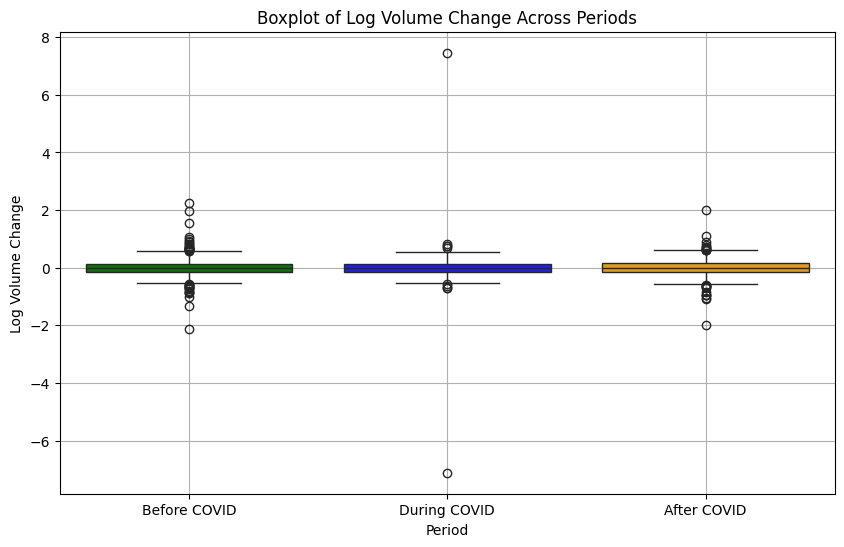

In [ ]:
# Combine log‐volume data for boxplot
df_volume = pd.DataFrame({
    'Log_Volume_Change': np.concatenate([s_before, s_during, s_after]),
    'Period': ['Before COVID']*len(s_before) + ['During COVID']*len(s_during) + ['After COVID']*len(s_after)
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_volume, x='Period', y='Log_Volume_Change',
            palette=['green', 'blue', 'orange'], hue='Period', dodge=False, legend=False)
plt.title('Boxplot of Log Volume Change Across Periods')
plt.xlabel('Period')
plt.ylabel('Log Volume Change')
plt.grid(True)
plt.show()


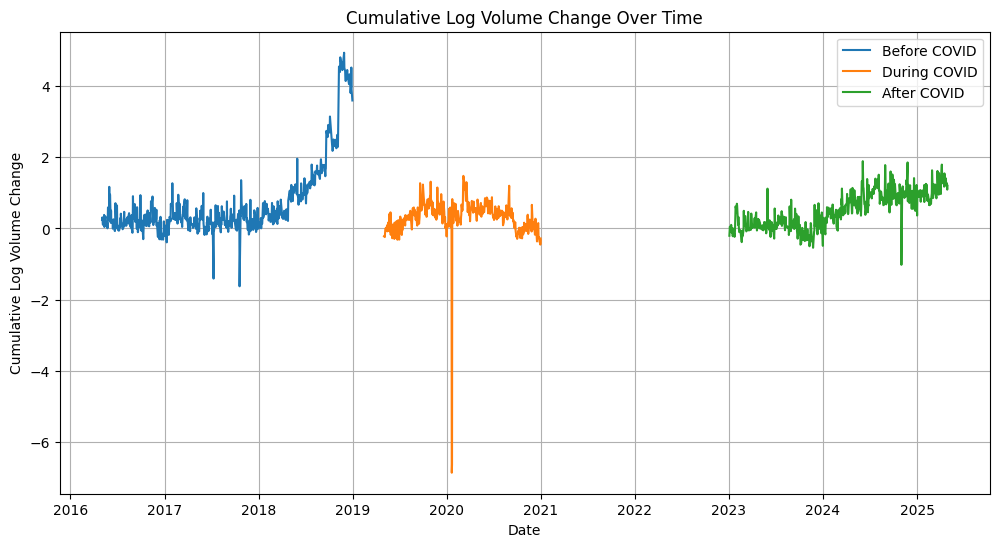

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(s_before.index, s_before.cumsum(), label='Before COVID')
plt.plot(s_during.index, s_during.cumsum(), label='During COVID')
plt.plot(s_after.index, s_after.cumsum(), label='After COVID')
plt.title('Cumulative Log Volume Change Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Log Volume Change')
plt.legend()
plt.grid(True)
plt.show()
